In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn import pipeline
import tensorflow as tf
import keras
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


Star Dataset: Stellar Classification: https://www.kaggle.com/vinesmsuic/star-categorization-giants-and-dwarfs

Importação dos dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UFC/2021.1/ML/dataset/Star3642_balanced.csv')

Analise dos dados

In [ ]:
df.shape

(3642, 7)

In [ ]:
df.head(10)

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1
5,4.90,8.37,0.76,-0.091,B9III,14.513628,0
6,8.60,5.09,1.37,0.448,F3V,17.133589,1
7,6.24,8.08,1.15,0.680,G0III,15.777057,0
8,7.31,1.86,0.87,1.164,K0/K1III,13.657564,0
9,9.52,1.28,1.33,1.500,K2III,15.056050,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   object 
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.3+ KB


In [ ]:
df.isna().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

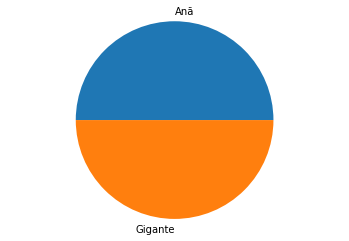

In [ ]:
labels = ['Anã','Gigante']
size = (df["TargetClass"].value_counts())
fig1,ax1 = plt.subplots()
ax1.pie(size, labels=labels)
ax1.axis('equal')
plt.show()

Transformando strings em valores númericos


In [ ]:
sptypes_df = pd.DataFrame(df["SpType"], columns=['SpType'])
labelencoder = LabelEncoder()
sptypes_df['SpType_Cat'] = labelencoder.fit_transform(df['SpType'])

Aplicação do One Hot Encoder

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(sptypes_df[['SpType_Cat']]).toarray())
df = df.join(enc_df)
df.head(5)

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,...,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583
0,5.99,13.73,0.58,1.318,K5III,16.678352,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.76,13.44,1.16,0.584,G0V,19.401997,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Divisão do dataset

In [ ]:
X = df.drop(["TargetClass", "SpType"], axis=1)
y = df["TargetClass"]
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.7, random_state=42, stratify=y)

Criação dos modelos

In [ ]:
model_knn = KNeighborsClassifier()
model_lr =  LogisticRegression(max_iter=10000)
model_svm = svm.SVC()
model_nb = GaussianNB()
model_tree = tree.DecisionTreeClassifier(random_state=42)
model_rf = RandomForestClassifier(n_estimators=15,max_depth=15, random_state=0, n_jobs=-1)
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1
                                      , random_state=0).fit(X_treino, y_treino)

Pré-processamento

In [ ]:
pipe_knn = pipeline.make_pipeline(preprocessing.StandardScaler(),
                         model_knn)
pipe_lr = pipeline.make_pipeline(preprocessing.StandardScaler(),
                         model_lr)

pipe_svm = pipeline.make_pipeline(preprocessing.StandardScaler(),
                         svm.SVC(random_state=1))

pipe_nb = pipeline.make_pipeline(preprocessing.StandardScaler(),
                         GaussianNB())

Parametros para os modelos

In [ ]:
param_knn = {'kneighborsclassifier__n_neighbors': np.arange(1,10,1),
             'kneighborsclassifier__weights':['uniform', 'distance'],
             'kneighborsclassifier__algorithm':['auto','ball_tree','kd_tree','brute']}

param_lr = [{'logisticregression__penalty':['l1'],'logisticregression__C':np.logspace(-5,4,10),
             'logisticregression__solver':['liblinear','saga']},
            {'logisticregression__penalty':['l2'],'logisticregression__C':np.logspace(-5,4,10),
             'logisticregression__solver':['newton-cg','lbfgs','sag','saga']},
            {'logisticregression__penalty':['elasticnet'],'logisticregression__C':np.logspace(-5,4,10),
             'logisticregression__solver':['saga'], 'logisticregression__l1_ratio':[0.5]},
            {'logisticregression__penalty':['none'],
             'logisticregression__solver':['newton-cg','lbfgs','sag','saga']}]
            
param_svm = {'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
             'gamma':['scale','auto']
             }

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]
param_nb = {'gaussiannb__var_smoothing': np.logspace(-9, 9, 18)}

In [ ]:
scores = []

Treinamento dos modelos

In [ ]:
knn_grid = GridSearchCV(pipe_knn,param_knn,cv=5,scoring='accuracy')
knn_grid.fit(X_treino,y_treino);
knn_grid.best_score_

0.9065937748732772

In [ ]:
scores.append(knn_grid.best_score_)

In [ ]:
lr_grid = GridSearchCV(pipe_lr,param_lr,cv=5,scoring='accuracy')
lr_grid.fit(X_treino,y_treino);


In [ ]:
scores.append(lr_grid.best_score_)

In [ ]:
svm_grid = GridSearchCV(pipe_svm,param_grid,cv=5,scoring='accuracy')
svm_grid.fit(X_treino,y_treino);
svm_grid.best_score_

0.9661262619915378

In [ ]:
scores.append(svm_grid.best_score_)

In [ ]:
param_nb = {'gaussiannb__var_smoothing': np.logspace(-20, -1, 20)}

In [ ]:
nb_grid = GridSearchCV(pipe_nb,param_nb,cv=5,scoring='accuracy', n_jobs=-1)
nb_grid.fit(X_treino, y_treino);
nb_grid.best_score_

0.9102676888274475

In [ ]:
scores.append(nb_grid.best_score_)

In [ ]:
model_tree = tree.DecisionTreeClassifier(random_state=42)
model_rf = RandomForestClassifier(n_jobs=-1)
model_gb = GradientBoostingClassifier(learning_rate=1.0)
tree_param = {'criterion':['gini','entropy'],'splitter':['best','random'], 'max_depth': np.arange(4,8,1)}
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(4,8,1),
    'criterion' :['gini', 'entropy']
}
gb_param = {'n_estimators': np.arange(100,200,50), 'max_depth': np.arange(1,5,1)}

In [ ]:
tree_grid = GridSearchCV(model_tree,tree_param, cv=5, scoring='accuracy')
tree_grid.fit(X_treino, y_treino)
tree_grid.best_score_

0.9166687612584307

In [ ]:
scores.append(tree_grid.best_score_)

In [ ]:
gb_grid = GridSearchCV(model_gb, gb_param, cv=5, scoring='accuracy')
gb_grid.fit(X_treino, y_treino);
gb_grid.best_score_

0.9496250680742323

In [ ]:
scores.append(gb_grid.best_score_)

In [ ]:
rf_grid = GridSearchCV(model_rf,param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_treino, y_treino);
rf_grid.best_score_

0.902027564827615

In [ ]:
scores.append(rf_grid.best_score_)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(12, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_treino, y_treino, epochs=150, batch_size=10)

Epoch 1/150
110/110 [==============================] - 1s 1ms/step - loss: 0.6119 - accuracy: 0.7170
Epoch 2/150
110/110 [==============================] - 0s 1ms/step - loss: 0.5363 - accuracy: 0.7985
Epoch 3/150
110/110 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.8590
Epoch 4/150
110/110 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.9121
Epoch 5/150
110/110 [==============================] - 0s 1ms/step - loss: 0.2425 - accuracy: 0.9258
Epoch 6/150
110/110 [==============================] - 0s 1ms/step - loss: 0.1811 - accuracy: 0.9432
Epoch 7/150
110/110 [==============================] - 0s 1ms/step - loss: 0.1457 - accuracy: 0.9505
Epoch 8/150
110/110 [==============================] - 0s 1ms/step - loss: 0.1173 - accuracy: 0.9606
Epoch 9/150
110/110 [==============================] - 0s 2ms/step - loss: 0.0978 - accuracy: 0.9689
Epoch 10/150
110/110 [==============================] - 0s 1ms/step - loss: 0.0772 - accura

In [ ]:
loss, accuracy = model.evaluate(X_treino, y_treino)
print(f'Accuracy: {accuracy*100:.2f}%')

35/35 [==============================] - 0s 1ms/step - loss: 4.9494e-07 - accuracy: 1.0000
Accuracy: 100.00%


In [ ]:
scores.append(accuracy)

Resultados


In [ ]:
result = {'Algoritmos': ['Knn', 'Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Booster', 'Neural Network']
          ,'Scores': scores}

In [ ]:
result_final = pd.DataFrame(data=result)
result_final

,Algoritmos,Scores
0,Knn,0.906594
1,Logistic Regression,0.965217
2,SVM,0.966126
3,Naive Bayes,0.910268
4,Decision Tree,0.916669
5,Random Forest,0.949625
6,Gradient Booster,0.902028
7,Neural Network,1.000000


In [ ]:
models = ['Knn', 'Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Booster', 'Neural Network']

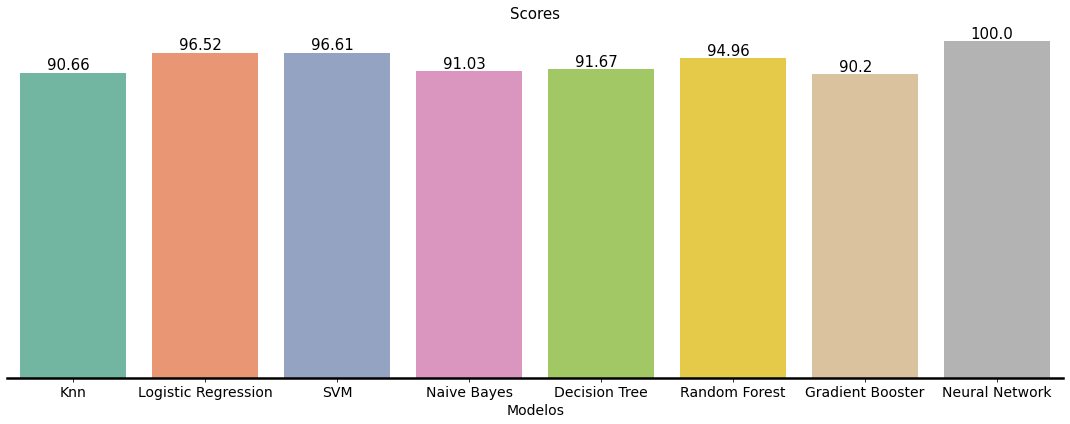

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x=models, y=scores, ax=ax, data=df,  palette='Set2')

ax.set_title("Scores", fontdict={'fontsize':15})
#mudando e nome e tamanho do label x
ax.set_xlabel('Modelos', fontdict={'fontsize':14})
#mudando tamanho do label eixo y
ax.set_ylabel('')
#mudando tamanho dos labels dos ticks
ax.tick_params(labelsize=14)
#aumentando espessura linha inferior
ax.spines['bottom'].set_linewidth(2.5)
#remoção dos outros três axis
for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)
#remoção dos ticks
ax.tick_params(axis='y', labelleft=False, left=None)  

for i in range(8):
   ax.text(x= i - 0.2, y=scores[i] + 0.01, s=str(round(scores[i]*100,2)),   
           fontsize=15)
fig.tight_layout();

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(12, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_teste, y_teste, epochs=150, batch_size=10)
loss, accuracy = model.evaluate(X_teste, y_teste)
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/150
255/255 [==============================] - 1s 1ms/step - loss: 0.5398 - accuracy: 0.7843
Epoch 2/150
255/255 [==============================] - 0s 1ms/step - loss: 0.3051 - accuracy: 0.9000
Epoch 3/150
255/255 [==============================] - 0s 1ms/step - loss: 0.1868 - accuracy: 0.9325
Epoch 4/150
255/255 [==============================] - 0s 1ms/step - loss: 0.1396 - accuracy: 0.9435
Epoch 5/150
255/255 [==============================] - 0s 1ms/step - loss: 0.1074 - accuracy: 0.9608
Epoch 6/150
255/255 [==============================] - 0s 1ms/step - loss: 0.0769 - accuracy: 0.9773
Epoch 7/150
255/255 [==============================] - 0s 1ms/step - loss: 0.0587 - accuracy: 0.9875
Epoch 8/150
255/255 [==============================] - 0s 1ms/step - loss: 0.0420 - accuracy: 0.9925
Epoch 9/150
255/255 [==============================] - 0s 1ms/step - loss: 0.0311 - accuracy: 0.9965
Epoch 10/150
255/255 [==============================] - 0s 1ms/step - loss: 0.0216 - accura